# An object in an orbit around a planet -- damped version, where sometimes the object accelerates into the X direction.

In [1]:
# Load Packages
import scipy
import matplotlib.pyplot
import numpy
import math
import malbrid
import random
random.seed(1234)

In [2]:
def get_dynamics_and_zero_crossing_functions_orbit(state_name):
    AOrbit = numpy.array([[0,0,1,0,0],[0,0,0,1,0],[-1,0,-0.01,0,0],[0,-1,0,-0.01,0],[0,0,0,0,0]])
    AOrbitAcc = numpy.array([[0,0,1,0,0],[0,0,0,1,0],[-1,0,-0.01,0,-0.25],[0,-1,0,-0.01,0],[0,0,0,0,0]])
    
    xPos = simulator.get_var("xPos")
    yPos = simulator.get_var("yPos")
    xSpeed = simulator.get_var("xSpeed")
    ySpeed = simulator.get_var("ySpeed")
    const = simulator.get_var("const")                     
                         
    def bumpToAcceleration(x):
        return "Acceleration",x,False
    def bumpToNoAcceleration(x):
        return "NoAcceleration",x,False
    
    if state_name=="NoAcceleration":
        zero_crossing_function = (xPos>-0.5) & (xPos<0.5) & (xSpeed<-0.2)
        return AOrbit, [(zero_crossing_function,"Switch",bumpToAcceleration)]
    elif state_name=="Acceleration":
        zero_crossing_function = (xPos<-0.5001) | (xPos>0.5001) | (xSpeed>-0.1)
        return AOrbitAcc, [(zero_crossing_function,"Switch",bumpToNoAcceleration)]
    else:
        raise Exception("Internal Test error:"+str(state_name))

'''A test case for Randomized Dynamics -- Product state case'''
simulator = malbrid.LinearSystemSimulator(["xPos", "yPos", "xSpeed", "ySpeed", "const"])

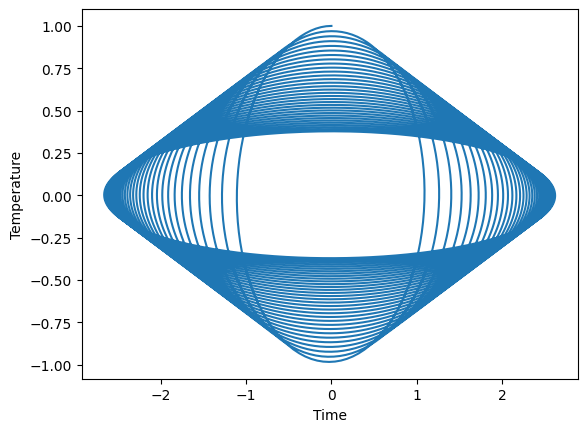

In [3]:
for i in range(0,1):
    simulator.simulate(get_dynamics_and_zero_crossing_functions_orbit, "NoAcceleration",numpy.array([0,1,-1,0,1]),
                           max_time=200,max_timestep=0.1)
    matplotlib.pyplot.plot(numpy.array(simulator.continuous_states)[:,0],numpy.array(simulator.continuous_states)[:,1])
    
            
# Finalize Plot
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('Temperature')
matplotlib.pyplot.show()